In [32]:
library(tidyverse) # metapackage of all tidyverse packages
library(dplyr)

In [35]:
BiocManager::install("Biobase")
library(Biobase)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.10 (BiocManager 1.30.16), R 3.6.1 (2019-07-05)
Warning message:
"package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'Biobase'"Old packages: 'askpass', 'backports', 'BH', 'blob', 'boot', 'broom', 'cachem',
  'callr', 'caret', 'class', 'cli', 'clipr', 'cluster', 'codetools',
  'colorspace', 'crayon', 'curl', 'data.table', 'dbplyr', 'digest', 'dplyr',
  'evaluate', 'fansi', 'forcats', 'foreach', 'formatR', 'fs', 'generics',
  'ggplot2', 'glmnet', 'glue', 'gower', 'haven', 'hexbin', 'highr', 'hms',
  'htmltools', 'htmlwidgets', 'httpuv', 'httr', 'ipred', 'IRdisplay',
  'IRkernel', 'iterators', 'jsonlite', 'KernSmooth', 'knitr', 'labeling',
  'later', 'lattice', 'lava', 'lme4', 'lubridate', 'magrittr', 'markdown',
  'MASS', 'Matrix', 'matrixStats', 'mgcv', 'mime', '

In [42]:
ptemp <- read.csv("C:/Users/neelj/Documents/HIVE/FAB Feature Selecion/GSE147515_FAB_lbl.csv")
head(ptemp)

X.1,X,FAB
1,GSM1254265.CEL,M2
3,GSM1254267.CEL,M5
4,GSM1254268.CEL,M2
5,GSM1254269.CEL,M1
6,GSM1254270.CEL,M4
7,GSM1254271.CEL,M0


In [43]:
ptemp$X.1 <- NULL
rownames(ptemp) <- ptemp$X
ptemp[1] <- NULL
head(ptemp)

,FAB
GSM1254265.CEL,M2
GSM1254267.CEL,M5
GSM1254268.CEL,M2
GSM1254269.CEL,M1
GSM1254270.CEL,M4
GSM1254271.CEL,M0


In [49]:
pdata <- AnnotatedDataFrame(ptemp)

In [45]:
etemp <- read.csv("C:/Users/neelj/Documents/HIVE/FAB Feature Selecion/GSE147515_FAB_mat.csv")
head(etemp)

X,GSM1254265.CEL,GSM1254267.CEL,GSM1254268.CEL,GSM1254269.CEL,GSM1254270.CEL,GSM1254271.CEL,GSM1254272.CEL,GSM1254273.CEL,GSM1254274.CEL,...,GSM726249.CEL,GSM726251.CEL,GSM726252.CEL,GSM726253.CEL,GSM726256.CEL,GSM726257.CEL,GSM726258.CEL,GSM726259.CEL,GSM726260.CEL,name
RFC2_1,7.537840,6.800871,6.752669,5.929756,7.353971,6.496232,6.716364,7.407105,7.955677,...,7.605745,7.701945,7.096387,6.600813,6.563042,6.671309,5.930616,6.119624,6.554417,RFC2
HSPA6_2,4.679401,4.777950,4.360962,4.509553,4.720435,7.669224,5.432612,4.435121,4.860942,...,4.396333,5.979429,4.177423,4.290783,5.271843,5.841040,7.307721,6.138064,4.855038,HSPA6
PAX8_3,6.798042,7.370561,7.043800,7.132901,7.272406,6.851993,7.215697,7.225802,7.017084,...,7.564590,6.726327,7.424036,7.026728,6.710751,7.198889,6.996386,6.894396,7.371354,PAX8
GUCA1A_4,2.704549,2.500655,2.644052,2.712234,2.861128,2.913571,2.820453,2.752378,2.886452,...,2.650575,2.795106,2.576289,2.807488,2.784839,2.746156,2.694078,3.009329,2.856732,GUCA1A
THRA_5,4.544424,5.050274,4.988216,4.862662,5.144750,4.837291,4.871102,4.981282,4.780484,...,4.846550,5.505493,5.088999,5.112156,5.743054,5.497159,5.444714,5.167476,5.273593,THRA
PTPN21_6,3.734027,3.630663,3.587355,4.006397,3.762099,3.608655,3.754732,3.931028,3.686961,...,3.784949,3.751392,3.702852,3.803101,3.597913,3.614316,3.799544,3.681782,3.887242,PTPN21


In [46]:
etemp$name <- NULL
rownames(etemp) <- etemp$X
etemp[1] <- NULL
head(etemp)

,GSM1254265.CEL,GSM1254267.CEL,GSM1254268.CEL,GSM1254269.CEL,GSM1254270.CEL,GSM1254271.CEL,GSM1254272.CEL,GSM1254273.CEL,GSM1254274.CEL,GSM1254275.CEL,...,GSM726248.CEL,GSM726249.CEL,GSM726251.CEL,GSM726252.CEL,GSM726253.CEL,GSM726256.CEL,GSM726257.CEL,GSM726258.CEL,GSM726259.CEL,GSM726260.CEL
RFC2_1,7.537840,6.800871,6.752669,5.929756,7.353971,6.496232,6.716364,7.407105,7.955677,6.978522,...,5.526605,7.605745,7.701945,7.096387,6.600813,6.563042,6.671309,5.930616,6.119624,6.554417
HSPA6_2,4.679401,4.777950,4.360962,4.509553,4.720435,7.669224,5.432612,4.435121,4.860942,6.589701,...,5.071652,4.396333,5.979429,4.177423,4.290783,5.271843,5.841040,7.307721,6.138064,4.855038
PAX8_3,6.798042,7.370561,7.043800,7.132901,7.272406,6.851993,7.215697,7.225802,7.017084,7.035230,...,6.637921,7.564590,6.726327,7.424036,7.026728,6.710751,7.198889,6.996386,6.894396,7.371354
GUCA1A_4,2.704549,2.500655,2.644052,2.712234,2.861128,2.913571,2.820453,2.752378,2.886452,2.818774,...,2.918437,2.650575,2.795106,2.576289,2.807488,2.784839,2.746156,2.694078,3.009329,2.856732
THRA_5,4.544424,5.050274,4.988216,4.862662,5.144750,4.837291,4.871102,4.981282,4.780484,4.604664,...,6.408416,4.846550,5.505493,5.088999,5.112156,5.743054,5.497159,5.444714,5.167476,5.273593
PTPN21_6,3.734027,3.630663,3.587355,4.006397,3.762099,3.608655,3.754732,3.931028,3.686961,3.656161,...,3.931349,3.784949,3.751392,3.702852,3.803101,3.597913,3.614316,3.799544,3.681782,3.887242


In [47]:
mat <- as.matrix(etemp)

In [50]:
eset <- new("ExpressionSet", exprs=mat, phenoData=pdata)

In [51]:
head(exprs(eset))

,GSM1254265.CEL,GSM1254267.CEL,GSM1254268.CEL,GSM1254269.CEL,GSM1254270.CEL,GSM1254271.CEL,GSM1254272.CEL,GSM1254273.CEL,GSM1254274.CEL,GSM1254275.CEL,...,GSM726248.CEL,GSM726249.CEL,GSM726251.CEL,GSM726252.CEL,GSM726253.CEL,GSM726256.CEL,GSM726257.CEL,GSM726258.CEL,GSM726259.CEL,GSM726260.CEL
RFC2_1,7.537840,6.800871,6.752669,5.929756,7.353971,6.496232,6.716364,7.407105,7.955677,6.978522,...,5.526605,7.605745,7.701945,7.096387,6.600813,6.563042,6.671309,5.930616,6.119624,6.554417
HSPA6_2,4.679401,4.777950,4.360962,4.509553,4.720435,7.669224,5.432612,4.435121,4.860942,6.589701,...,5.071652,4.396333,5.979429,4.177423,4.290783,5.271843,5.841040,7.307721,6.138064,4.855038
PAX8_3,6.798042,7.370561,7.043800,7.132901,7.272406,6.851993,7.215697,7.225802,7.017084,7.035230,...,6.637921,7.564590,6.726327,7.424036,7.026728,6.710751,7.198889,6.996386,6.894396,7.371354
GUCA1A_4,2.704549,2.500655,2.644052,2.712234,2.861128,2.913571,2.820453,2.752378,2.886452,2.818774,...,2.918437,2.650575,2.795106,2.576289,2.807488,2.784839,2.746156,2.694078,3.009329,2.856732
THRA_5,4.544424,5.050274,4.988216,4.862662,5.144750,4.837291,4.871102,4.981282,4.780484,4.604664,...,6.408416,4.846550,5.505493,5.088999,5.112156,5.743054,5.497159,5.444714,5.167476,5.273593
PTPN21_6,3.734027,3.630663,3.587355,4.006397,3.762099,3.608655,3.754732,3.931028,3.686961,3.656161,...,3.931349,3.784949,3.751392,3.702852,3.803101,3.597913,3.614316,3.799544,3.681782,3.887242


In [58]:
library(ggplot2)
library(ggrepel)

Warning message:
"package 'ggrepel' was built under R version 3.6.3"

In [59]:
pca <- prcomp(t(mat))

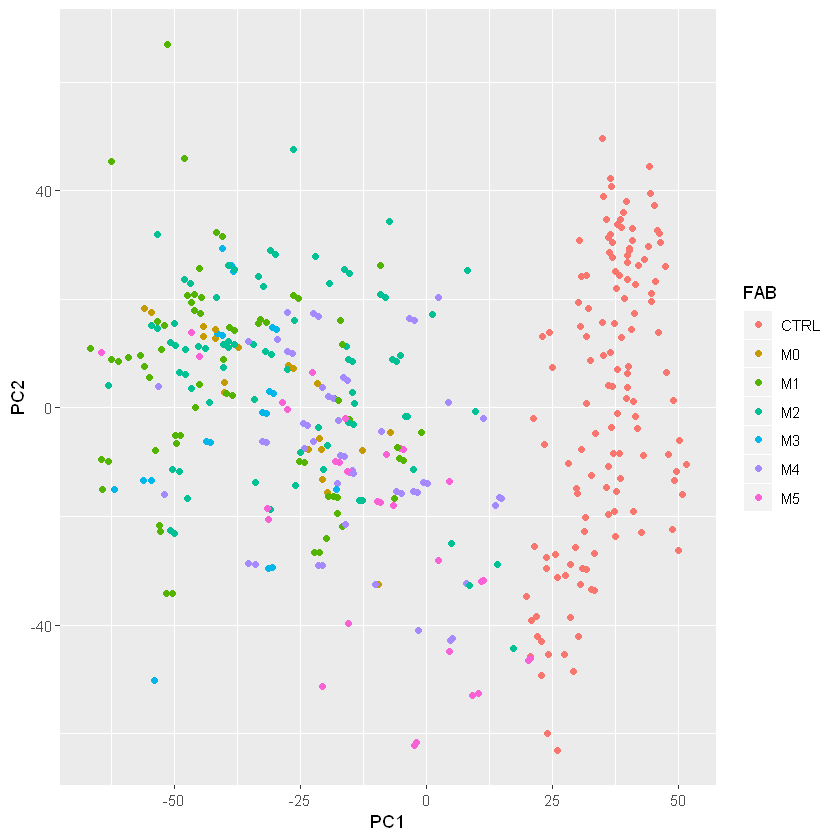

In [64]:
cbind(pData(eset), pca$x) %>% ggplot(aes(x=PC1, y=PC2, col=FAB)) + geom_point() 

# DGE

In [70]:
lbl = pData(eset)
head(lbl)

,FAB
GSM1254265.CEL,M2
GSM1254267.CEL,M5
GSM1254268.CEL,M2
GSM1254269.CEL,M1
GSM1254270.CEL,M4
GSM1254271.CEL,M0


In [72]:
m0.lbl <- lbl[lbl$FAB %in% c("CTRL", "M0"),]

[1] M0 M0 M0 M0 M0 M0
Levels: CTRL M0 M1 M2 M3 M4 M5

In [ ]:
colnames(design) <- c("")